In [143]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import grad
import matplotlib.pyplot as plt

In [201]:
tk = 1313
R = 8.3143

gagfcc=-7209.5+118.2007*tk
gagl=3815.93+109.3029*tk-1.044523e-20*tk**7
glag=gagl-gagfcc;
gaufcc=-15745+225.14*tk
gaul=-3352+215.88*tk-3.5899325e-21*tk**7
glau1=gaul-gaufcc
glau=12552-9.385866*tk

In [202]:
def funcs(xl, xs, tk):
    gl = (1-xl)*glag+xl*glau1+R*tk*((1-xl)*torch.log(1-xl)+xl*torch.log(xl))+(1-xl)*xl*(-16402+1.14*tk)
    gs = R*tk*((1-xs)*torch.log(1-xs)+xs*torch.log(xs))+(1-xs)*xs*(-15599)
    glxl = 1367.57-0.3622*tk+0.68552975*10**-20*tk**7+R*tk*(-torch.log(1-xl)+torch.log(xl))-xl*(-16402+1.14*tk)+(1-xl)*(-16402+1.14*tk)
    gsxs = R*tk*(-torch.log(1-xs)+torch.log(xs))+31198*xs-15599
    
    return gl, gs, glxl, gsxs

In [232]:
seq = nn.Sequential(
    nn.Linear(1, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 2),
    nn.Sigmoid()
    )

In [238]:
loss_fn = nn.MSELoss()

opt = torch.optim.Adam(seq.parameters(), lr=0.0001/2)
nr_epochs = 10000
inp = torch.tensor([tk/1000], dtype=torch.float)

for i in range(nr_epochs):
    xl, xs = seq(inp)[0], seq(inp)[1]
    #print(xl, xs)

    gl, gs, glxl, gsxs = funcs(xl, xs, tk)
    #print(glxl, gsxs)
    #print(gl - xl * glxl, gs - xs * gsxs)
    
    opt.zero_grad()
    loss = loss_fn(gl - xl * glxl, gs - xs * gsxs) + loss_fn(gsxs, glxl)
    if i % (nr_epochs / 100) == 0:
        print(loss)
    loss.backward()
    opt.step()
    #print()

print()
print(xl, xs)
print(glxl, gsxs)
print(gl - xl * glxl, gs - xs * gsxs)

tensor(54444.2930, grad_fn=<AddBackward0>)
tensor(9915.6641, grad_fn=<AddBackward0>)
tensor(9835.6738, grad_fn=<AddBackward0>)
tensor(9731.9375, grad_fn=<AddBackward0>)
tensor(9607.7188, grad_fn=<AddBackward0>)
tensor(9465.6348, grad_fn=<AddBackward0>)
tensor(9307.8398, grad_fn=<AddBackward0>)
tensor(9135.8223, grad_fn=<AddBackward0>)
tensor(8950.8516, grad_fn=<AddBackward0>)
tensor(8754.0322, grad_fn=<AddBackward0>)
tensor(8545.9990, grad_fn=<AddBackward0>)
tensor(8328.0732, grad_fn=<AddBackward0>)
tensor(8100.9731, grad_fn=<AddBackward0>)
tensor(7866.0078, grad_fn=<AddBackward0>)
tensor(7623.2173, grad_fn=<AddBackward0>)
tensor(7374.0376, grad_fn=<AddBackward0>)
tensor(7118.7349, grad_fn=<AddBackward0>)
tensor(6858.7783, grad_fn=<AddBackward0>)
tensor(6593.9365, grad_fn=<AddBackward0>)
tensor(6325.5166, grad_fn=<AddBackward0>)
tensor(6054.0718, grad_fn=<AddBackward0>)
tensor(5780.4990, grad_fn=<AddBackward0>)
tensor(5547.5400, grad_fn=<AddBackward0>)
tensor(5362.4414, grad_fn=<AddBac

In [239]:
x = torch.arange(57, 63, requires_grad=False)/100

In [240]:
gl, gs, glxl, gsxs = funcs(x, x, tk)
gll, gsl, glxll, gsxsl = funcs(xl.detach(), xl.detach(), tk)
gls, gss, glxls, gsxss = funcs(xs.detach(), xs.detach(), tk)

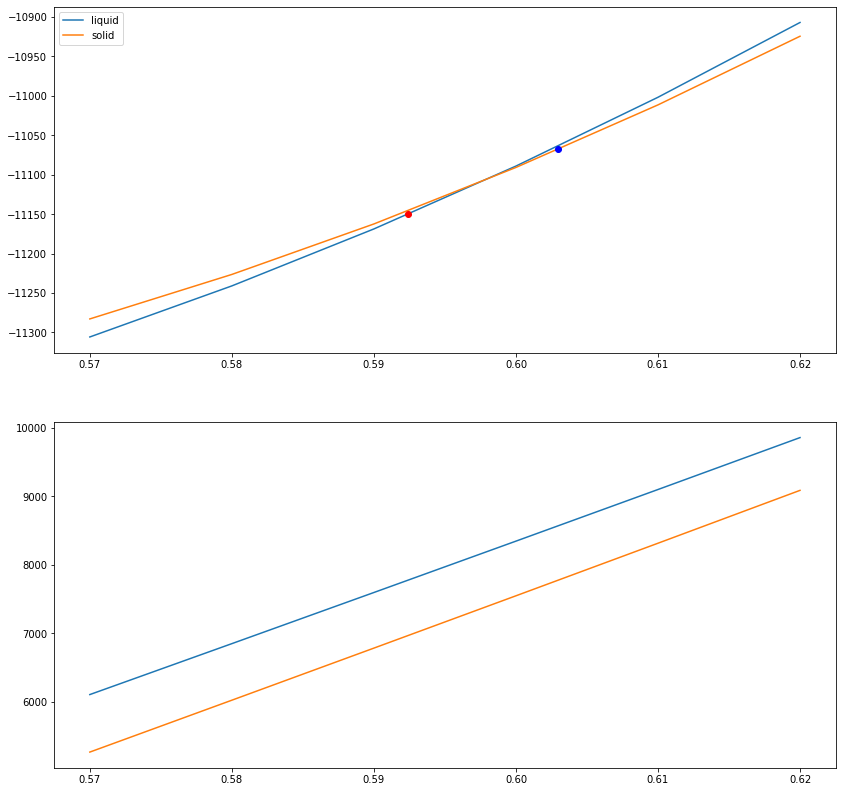

In [241]:
fig, ax = plt.subplots(2, 1, figsize=(14, 14))
ax[0].plot(x, gl, label='liquid')
ax[0].plot(x, gs, label='solid')
ax[0].plot(xl.detach(), gll, 'ro')
ax[0].plot(xs.detach(), gss, 'bo')
ax[0].legend()
ax[1].plot(x, glxl)
ax[1].plot(x, gsxs)

In [242]:
inp = torch.tensor([1200/1000], dtype=torch.float)

xl, xs = seq(inp)[0], seq(inp)[1]
gl, gs, glxl, gsxs = funcs(xl, xs, tk)

print(xl, xs)
print(glxl, gsxs)
print(gl - xl * glxl, gs - xs * gsxs)

tensor(0.5838, grad_fn=<SelectBackward0>) tensor(0.5970, grad_fn=<SelectBackward0>)
tensor(7130.7036, grad_fn=<AddBackward0>) tensor(7316.6992, grad_fn=<SubBackward0>)
tensor(-15377.3193, grad_fn=<SubBackward0>) tensor(-15481.1738, grad_fn=<SubBackward0>)
